### Use Case 1: Real-Time Sales Data Analysis and Insights

Import necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style("whitegrid")

Sample dataset creation

In [15]:
np.random.seed(42)  
sample_data = pd.DataFrame({
    'Date': pd.date_range(start='2024-11-01', end='2024-11-10', freq='D').repeat(5),
    'Store_ID': np.random.choice(['S001', 'S002', 'S003', 'S004', 'S005'], size=50),
    'Product_ID': np.random.choice(['P001', 'P002', 'P003', 'P004'], size=50),
    'Units_Sold': np.random.randint(10, 100, size=50),
    'Sales_Amount': np.random.uniform(100, 2000, size=50),
    'Discount_Applied': np.random.uniform(0, 20, size=50),
    'Customer_Segment': np.random.choice(['Regular', 'Premium', 'New'], size=50)
})
sample_data.to_csv('sales_data.csv', index=False)
sample_data.head()

,Date,Store_ID,Product_ID,Units_Sold,Sales_Amount,Discount_Applied,Customer_Segment
0,2024-11-01,S004,P004,98,310.692560,8.220740,Premium
1,2024-11-01,S005,P003,69,934.739354,0.661015,Regular
2,2024-11-01,S003,P004,50,483.266484,6.901425,New
3,2024-11-01,S005,P003,38,1801.950832,12.687027,Regular
4,2024-11-01,S005,P004,24,1003.203424,13.614109,Premium


Load the dataset

In [16]:
# Load the data
data_path = 'sales_data.csv'
raw_data = pd.read_csv(data_path)

raw_data.head()

,Date,Store_ID,Product_ID,Units_Sold,Sales_Amount,Discount_Applied,Customer_Segment
0,2024-11-01,S004,P004,98,310.692560,8.220740,Premium
1,2024-11-01,S005,P003,69,934.739354,0.661015,Regular
2,2024-11-01,S003,P004,50,483.266484,6.901425,New
3,2024-11-01,S005,P003,38,1801.950832,12.687027,Regular
4,2024-11-01,S005,P004,24,1003.203424,13.614109,Premium


Data Cleaning
* Handle missing values, incorrect formats, and outliers.

In [8]:
# Data Cleaning and Handling Missing Values
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Units_Sold'].fillna(df['Units_Sold'].median(), inplace=True)
df['Sales_Amount'].fillna(df['Sales_Amount'].median(), inplace=True)
df['Discount_Applied'].fillna(0, inplace=True)

# Handle Outliers Using IQR Method
for col in ['Units_Sold', 'Sales_Amount', 'Discount_Applied']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)
clean_data = df
clean_data.head()

,Date,Store_ID,Product_ID,Units_Sold,Sales_Amount,Discount_Applied,Customer_Segment
0,2024-11-01,S004,P004,98,310.692560,8.220740,Premium
1,2024-11-01,S005,P003,69,934.739354,0.661015,Regular
2,2024-11-01,S003,P004,50,483.266484,6.901425,New
3,2024-11-01,S005,P003,38,1801.950832,12.687027,Regular
4,2024-11-01,S005,P004,24,1003.203424,13.614109,Premium


Data Aggregation
* Aggregate sales data at different levels, such as by date, store, and product

In [9]:
# Aggregate Sales Data
aggregations = {
    'daily': clean_data.groupby('Date').agg({
        'Sales_Amount': 'sum',
        'Units_Sold': 'sum'
    }).reset_index(),
    
    'store': clean_data.groupby('Store_ID').agg({
        'Sales_Amount': 'sum',
        'Units_Sold': 'sum',
        'Discount_Applied': 'mean'
    }).reset_index(),
    
    'product': clean_data.groupby('Product_ID').agg({
        'Sales_Amount': ['sum', 'mean'],
        'Units_Sold': ['sum', 'mean'],
        'Discount_Applied': 'mean'
    }).reset_index()
}

aggregations['daily'].head(), aggregations['store'].head(), aggregations['product'].head()

(        Date  Sales_Amount  Units_Sold
 0 2024-11-01   4533.852653         279
 1 2024-11-02   5330.525008         324
 2 2024-11-03   6808.062764         293
 3 2024-11-04   3730.868303         215
 4 2024-11-05   4494.789939         159,
   Store_ID  Sales_Amount  Units_Sold  Discount_Applied
 0     S001   5289.787043         303          8.959271
 1     S002  10239.253317         527         11.173990
 2     S003  10507.868275         673          9.522757
 3     S004  10266.176143         760         13.270385
 4     S005  11209.450991         312          9.875348,
   Product_ID  Sales_Amount              Units_Sold            Discount_Applied
                        sum         mean        sum       mean             mean
 0       P001   7533.813584  1076.259083        384  54.857143        11.548957
 1       P002  17926.919833   995.939991        729  40.500000        12.388022
 2       P003   8013.296590   890.366288        519  57.666667         7.411671
 3       P004  14038.5

Data Analysis

* Calculate total sales and average sales per product.
* Identify the store with the highest sales performance.
* Analyze the impact of discounts on sales amounts.

In [11]:
# Sales Analysis Insights
analysis = {
    'total_sales': clean_data['Sales_Amount'].sum(),
    'avg_sales_per_product': clean_data.groupby('Product_ID')['Sales_Amount'].mean(),
    'top_store': clean_data.groupby('Store_ID')['Sales_Amount'].sum().idxmax(),
    'discount_impact': clean_data.groupby(
        pd.qcut(clean_data['Discount_Applied'], 4)
    )['Sales_Amount'].mean()
}

# Display Analysis Results
print(f"Total Sales: ${analysis['total_sales']:,.2f}")
print(f"Top Performing Store: {analysis['top_store']}")
print("\nAverage Sales per Product:")
for product, avg_sales in analysis['avg_sales_per_product'].items():
    print(f"{product}: ${avg_sales:,.2f}")

Total Sales: $47,512.54
Top Performing Store: S005

Average Sales per Product:
P001: $1,076.26
P002: $995.94
P003: $890.37
P004: $877.41


Data Visualization (using pandas, matplotlib and seaborn)

* Sales trends over time.
* Sales distribution across different stores.
* Performance comparison of products.

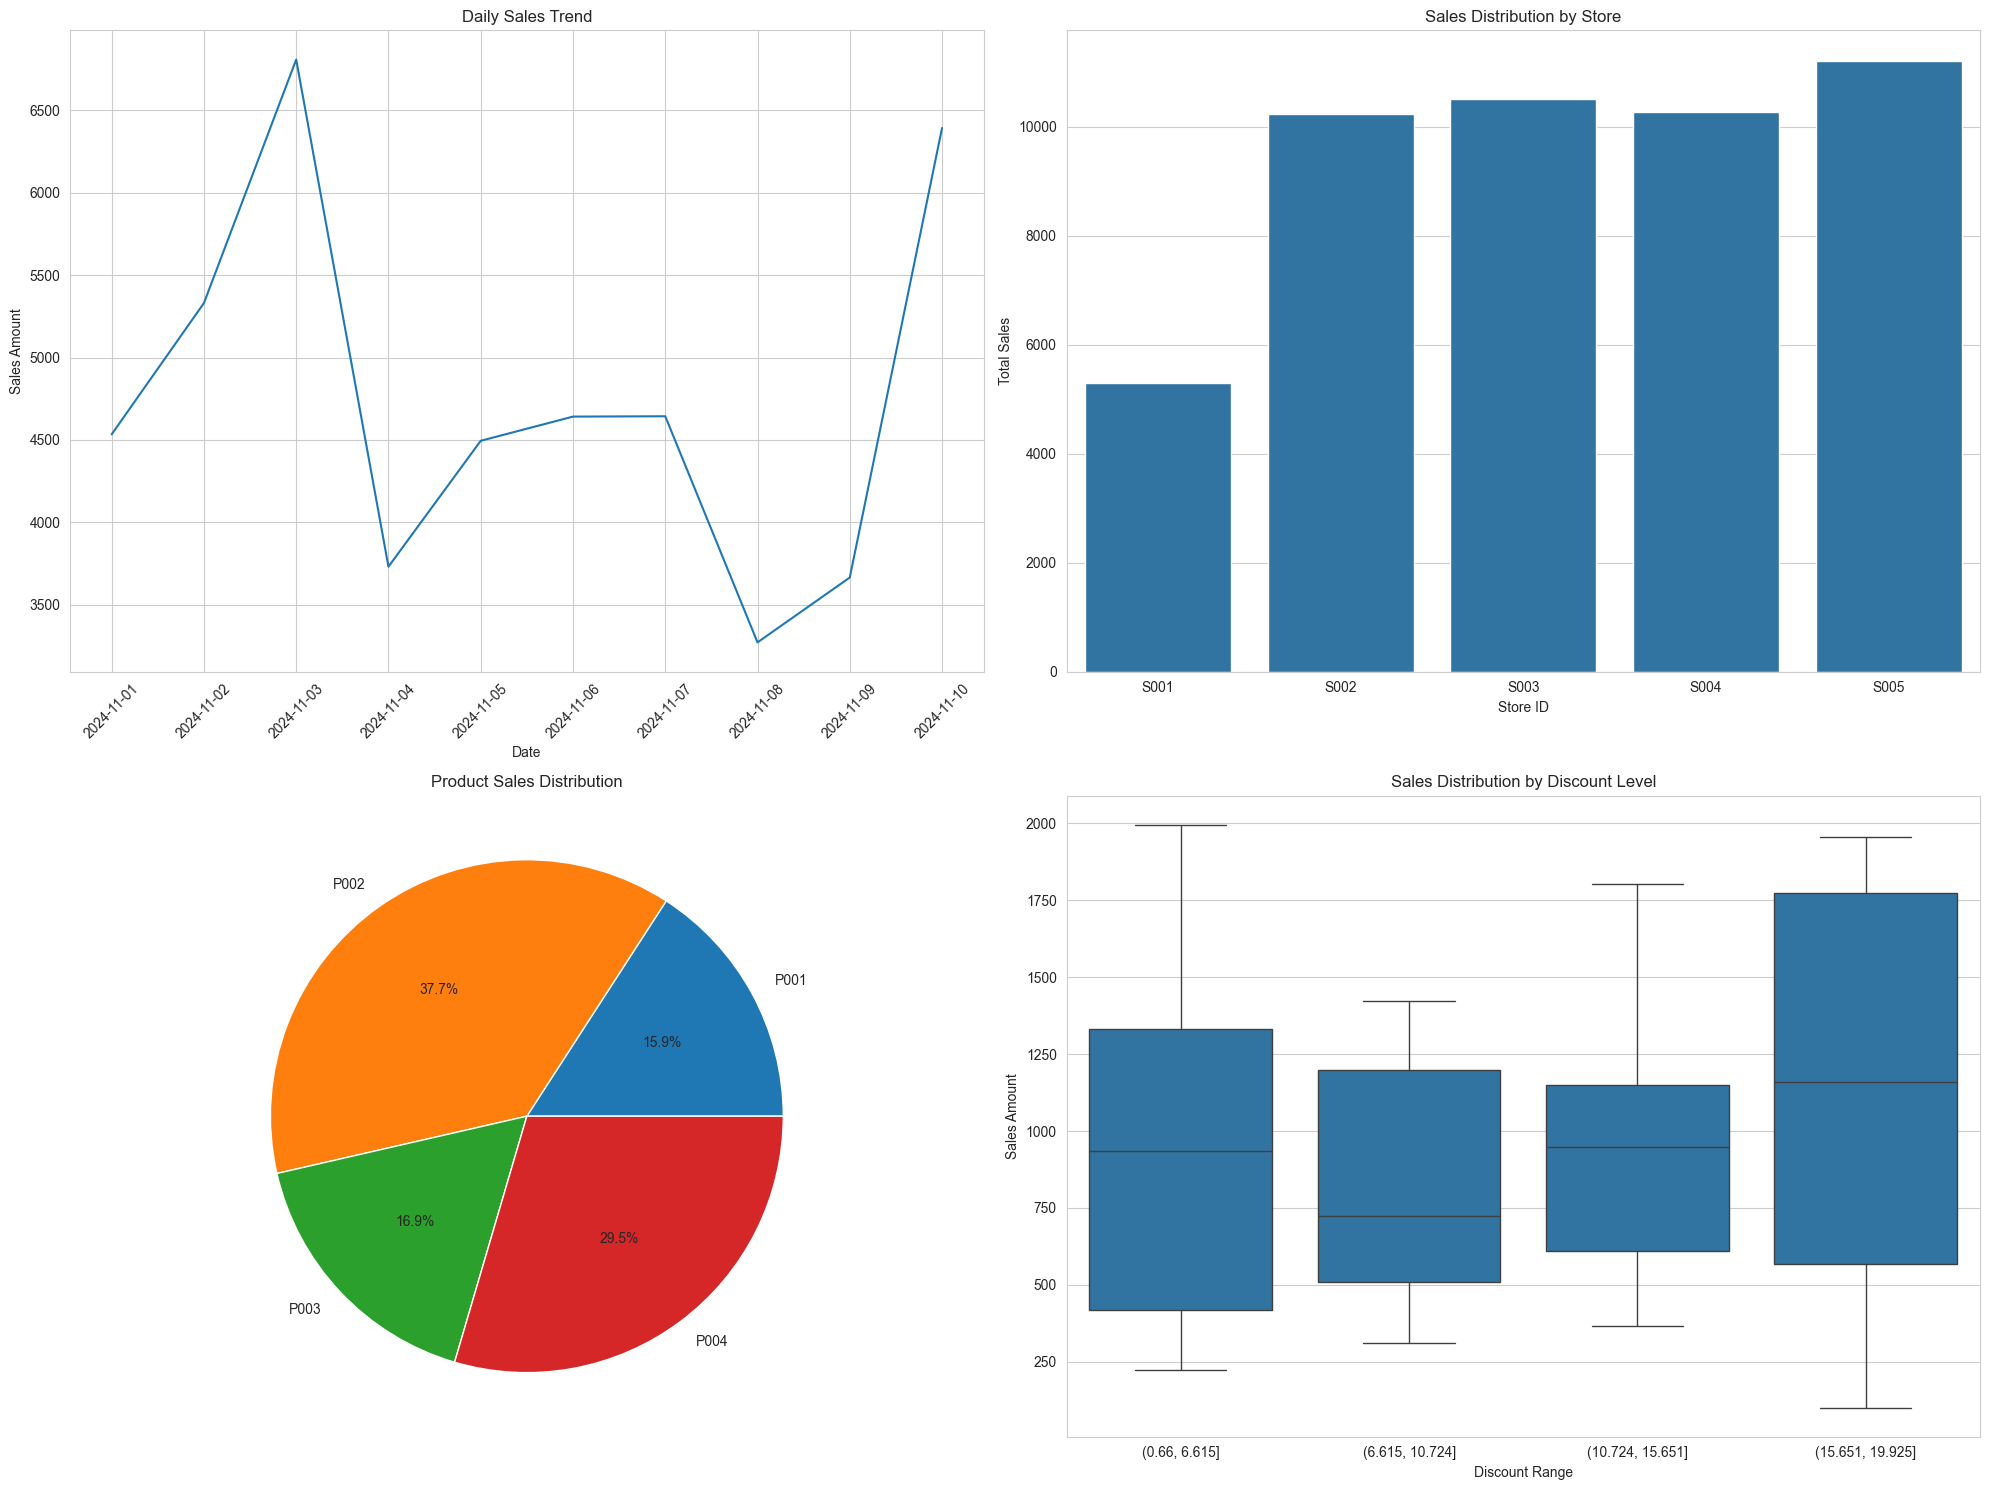

In [12]:
fig = plt.figure(figsize=(20, 15))

# Sales Trends Over Time
plt.subplot(2, 2, 1)
daily_sales = clean_data.groupby('Date')['Sales_Amount'].sum()
sns.lineplot(data=daily_sales)
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales Amount')

# Sales Distribution Across Stores
plt.subplot(2, 2, 2)
store_sales = clean_data.groupby('Store_ID')['Sales_Amount'].sum()
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Sales Distribution by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')

# Product Performance Comparison
plt.subplot(2, 2, 3)
product_sales = clean_data.groupby('Product_ID')['Sales_Amount'].sum()
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%')
plt.title('Product Sales Distribution')

# Discount Impact Analysis
plt.subplot(2, 2, 4)
sns.boxplot(x=pd.qcut(clean_data['Discount_Applied'], 4), y=clean_data['Sales_Amount'])
plt.title('Sales Distribution by Discount Level')
plt.xlabel('Discount Range')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()